In [1]:
#!/usr/bin/env julia

using Yao
using Yao.ConstGate # needed for P1 = 0.5*(I - sigma_z) block

#=
H(t) = Ω(t) ∑_i σ_i^x - δ(t) ∑_i n_i + u ∑_ij n_i n_j
=#

const u = 1.35
const Ω_max = 1.89
const δ_0 = -1.0
const δ_max = 1.0

function get_edges(graph::Vector{NTuple{2, Float64}})
    Nv = size(graph)[1]
    edges = falses(Nv, Nv)
    for i in 1:(Nv-1)
        xi, yi = graph[i]
        for j in (i+1):Nv
            xj, yj = graph[j]

            dij = sqrt((xi - xj)^2. + (yi - yj)^2.)
            if dij <= 1.0
                edges[i,j] = true
            end
        end
    end
    return findall(edges)
end

function Ω(t::Float64)
    if 0 <= t <= 0.25
        return (Ω_max / 0.25) * t
    elseif 0.25 < t <= 0.69
        return Ω_max
    elseif 0.69 < t <= 1
        return - Ω_max * t / 0.31 + Ω_max * (1 + 0.69/0.31)
    end
end

function δ(t::Float64)
    slope = (δ_0 - δ_max)/(0.25 - 0.69)
    if 0 <= t <= 0.25
        return δ_0
    elseif 0.25 < t <= 0.69
        return t * slope + (δ_max - slope * 0.69)
    elseif 0.69 < t <= 1
        return δ_max
    end
end 

function hamiltonian(graph::Vector{NTuple{2, Float64}}, edges::Vector{CartesianIndex{2}}, t::Float64)
    # the UD-MIS Hamiltonian
    Nv = size(graph)[1] # number of vertices

    interaction_term = map(1:size(edges)[1]) do i
        l,m = edges[i][1], edges[i][2]
        repeat(Nv,u*P1,(l,m))
    end |> sum
    interaction_term - δ(t)*sum(map(i->put(Nv,i=>P1), 1:Nv)) + Ω(t)*sum(map(i->put(Nv,i=>X), 1:Nv))
end

function run_annealing(graph::Vector{NTuple{2, Float64}}, edges::Vector{CartesianIndex{2}}, dt::Float64)
    psi_t = zero_state(size(graph)[1])
    for t in 0:dt:1.0
        h = hamiltonian(graph, edges, t)
        psi_t = psi_t |> TimeEvolution(h, dt * 100)
    end
    return psi_t
end

graph = [(0.3461717838632017, 1.4984640297338632), 
         (0.6316400411846113, 2.5754677320579895), 
         (1.3906262250927481, 2.164978861396621), 
         (0.66436005100802, 0.6717919819739032), 
         (0.8663329771713457, 3.3876341010035995), 
         (1.1643107343501296, 1.0823066243402013)
        ]
edges = get_edges(graph)
dt = 0.001

0.001

In [2]:
#psi = run_annealing(graph, edges, dt)
#open("task2_data.dat","w") do io
#    for sample in measure(psi; nshots=10000)
#        println(io, sample)
#    end
#end

In [3]:
psi = run_annealing(graph, edges, dt)

ArrayReg{1, ComplexF64, Array...}
    active qubits: 6/6

In [4]:
n_shots = 8192
samples = measure(psi; nshots=n_shots)
@show samples

01 ₍₂₎, 010101 ₍₂₎, 110100 ₍₂₎, 010101 ₍₂₎, 110100 ₍₂₎, 011100 ₍₂₎, 011100 ₍₂₎, 110100 ₍₂₎, 010101 ₍₂₎, 110100 ₍₂₎, 010101 ₍₂₎, 110100 ₍₂₎, 011100 ₍₂₎, 011100 ₍₂₎, 110100 ₍₂₎, 011100 ₍₂₎, 011100 ₍₂₎, 110100 ₍₂₎, 110100 ₍₂₎, 011100 ₍₂₎, 011100 ₍₂₎, 011100 ₍₂₎, 011100 ₍₂₎, 010101 ₍₂₎, 010101 ₍₂₎, 010101 ₍₂₎, 011100 ₍₂₎, 110100 ₍₂₎, 011100 ₍₂₎, 010101 ₍₂₎, 010101 ₍₂₎, 010101 ₍₂₎, 111100 ₍₂₎, 010101 ₍₂₎, 011100 ₍₂₎, 011100 ₍₂₎, 011100 ₍₂₎, 110100 ₍₂₎, 011100 ₍₂₎, 011100 ₍₂₎, 110100 ₍₂₎, 010101 ₍₂₎, 011100 ₍₂₎, 111100 ₍₂₎, 110100 ₍₂₎, 110100 ₍₂₎, 011100 ₍₂₎, 110100 ₍₂₎, 000101 ₍₂₎, 010101 ₍₂₎, 010101 ₍₂₎, 011100 ₍₂₎, 011100 ₍₂₎, 100100 ₍₂₎, 110100 ₍₂₎, 110100 ₍₂₎, 110100 ₍₂₎, 111100 ₍₂₎, 011101 ₍₂₎, 010001 ₍₂₎, 110101 ₍₂₎, 100010 ₍₂₎, 010101 ₍₂₎, 110100 ₍₂₎, 110101 ₍₂₎, 011100 ₍₂₎, 011100 ₍₂₎, 011100 ₍₂₎, 110100 ₍₂₎, 001100 ₍₂₎, 010101 ₍₂₎, 010101 ₍₂₎, 011100 ₍₂₎, 111100 ₍₂₎, 011100 ₍₂₎, 010101 ₍₂₎, 010001 ₍₂₎, 011100 ₍₂₎, 010101 ₍₂₎, 011100 ₍₂₎, 011000 ₍₂₎, 010101 ₍₂₎, 011100 ₍₂₎, 001100 ₍

8192-element Vector{BitBasis.BitStr64{6}}:
 011100 ₍₂₎
 011100 ₍₂₎
 011100 ₍₂₎
 010101 ₍₂₎
 110100 ₍₂₎
 110100 ₍₂₎
 010101 ₍₂₎
 010101 ₍₂₎
 011100 ₍₂₎
 010101 ₍₂₎
 010101 ₍₂₎
 110100 ₍₂₎
 010101 ₍₂₎
          ⋮
 010101 ₍₂₎
 110101 ₍₂₎
 110100 ₍₂₎
 010101 ₍₂₎
 010101 ₍₂₎
 011100 ₍₂₎
 010100 ₍₂₎
 110100 ₍₂₎
 111100 ₍₂₎
 010101 ₍₂₎
 011100 ₍₂₎
 010101 ₍₂₎

In [5]:
Save = zeros(Int64, n_shots)

8192-element Vector{Int64}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [6]:
Num = zeros(Int64, 2^size(graph)[1])

64-element Vector{Int64}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [7]:
Pr = zeros(2^size(graph)[1])

64-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [8]:
for i in 1:n_shots
    Save[i] = Int64(samples[i])
end

In [9]:
for i in 1:n_shots
    Num[Save[i] + 1] += 1
end

In [10]:
@show Num

Num = [0, 0, 0, 2, 2, 75, 0, 0, 1, 0, 7, 2, 56, 5, 0, 0, 3, 63, 0, 0, 42, 2312, 0, 0, 57, 7, 0, 0, 2350, 234, 0, 0, 0, 1, 5, 0, 72, 5, 0, 0, 0, 0, 1, 0, 6, 0, 0, 0, 68, 5, 0, 0, 2320, 225, 0, 0, 6, 0, 0, 0, 260, 0, 0, 0]


64-element Vector{Int64}:
    0
    0
    0
    2
    2
   75
    0
    0
    1
    0
    7
    2
   56
    ⋮
 2320
  225
    0
    0
    6
    0
    0
    0
  260
    0
    0
    0

In [11]:
idx = 0
for i in 1:2^size(graph)[1]
    idx += Num[i]
end

In [12]:
idx

8192

In [13]:
for i in 1:2^size(graph)[1]
    Pr[i]=Num[i]/n_shots
end

Pr

64-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.000244140625
 0.000244140625
 0.0091552734375
 0.0
 0.0
 0.0001220703125
 0.0
 0.0008544921875
 0.000244140625
 0.0068359375
 ⋮
 0.283203125
 0.0274658203125
 0.0
 0.0
 0.000732421875
 0.0
 0.0
 0.0
 0.03173828125
 0.0
 0.0
 0.0

In [14]:
@show Pr

Pr = [0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0091552734375, 0.0, 0.0, 0.0001220703125, 0.0, 0.0008544921875, 0.000244140625, 0.0068359375, 0.0006103515625, 0.0, 0.0, 0.0003662109375, 0.0076904296875, 0.0, 0.0, 0.005126953125, 0.2822265625, 0.0, 0.0, 0.0069580078125, 0.0008544921875, 0.0, 0.0, 0.286865234375, 0.028564453125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0006103515625, 0.0, 0.0087890625, 0.0006103515625, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.000732421875, 0.0, 0.0, 0.0, 0.00830078125, 0.0006103515625, 0.0, 0.0, 0.283203125, 0.0274658203125, 0.0, 0.0, 0.000732421875, 0.0, 0.0, 0.0, 0.03173828125, 0.0, 0.0, 0.0]


64-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.000244140625
 0.000244140625
 0.0091552734375
 0.0
 0.0
 0.0001220703125
 0.0
 0.0008544921875
 0.000244140625
 0.0068359375
 ⋮
 0.283203125
 0.0274658203125
 0.0
 0.0
 0.000732421875
 0.0
 0.0
 0.0
 0.03173828125
 0.0
 0.0
 0.0

In [15]:
idx = 0
for i in 1:2^size(graph)[1]
    idx += Pr[i]
end

In [16]:
idx

1.0

In [17]:
x = range(0, stop = 2^size(graph)[1]-1) #막대그래프 만들때, x축 index 넣기 위해서 만드는중

0:63

In [18]:
size(x)

(64,)

In [19]:
x

0:63

In [20]:
y = string.(x, base=2, pad=6)

64-element Vector{String}:
 "000000"
 "000001"
 "000010"
 "000011"
 "000100"
 "000101"
 "000110"
 "000111"
 "001000"
 "001001"
 "001010"
 "001011"
 "001100"
 ⋮
 "110100"
 "110101"
 "110110"
 "110111"
 "111000"
 "111001"
 "111010"
 "111011"
 "111100"
 "111101"
 "111110"
 "111111"

In [21]:
#z = parse(Int, x; base=2)

LoadError: MethodError: no method matching parse(::Type{Int64}, ::UnitRange{Int64}; base=2)
[0mClosest candidates are:
[0m  parse(::Type{T}, [91m::AbstractChar[39m; base) where T<:Integer at parse.jl:40
[0m  parse(::Type{T}, [91m::AbstractString[39m; base) where T<:Integer at parse.jl:240
[0m  parse(::Type{T}, [91m::AbstractString[39m; kwargs...) where T<:Real at parse.jl:379

### Convert an Integer to a String in Julia
## string(n :: integer, base :: integer, pad :: integer)
n : 변환하기를 원하는 숫자, base : 몇진수 표현인지 기입, pad : 몇개를 바탕에 깔지

### Convert a String to an Integer in Julia
## parse(type, str ; base)

In [22]:
using PyPlot

In [23]:
#다 잘됨
#plt.figure(figsize=(30,10))
#plt.xticks(x,y, rotation=30, fontsize = 9)
#plt.xlabel("Bit_strings") #이런 레이블 어떻게 넣는지 찾기. 
#plt.ylabel("Probability")
#plt.bar(x,Pr)
#plt.show()
##savefig("task1")

## 라벨이 안보여서 새로 그림을 그림(해결)
## 새로운 방법 시작한 김에 그려봄

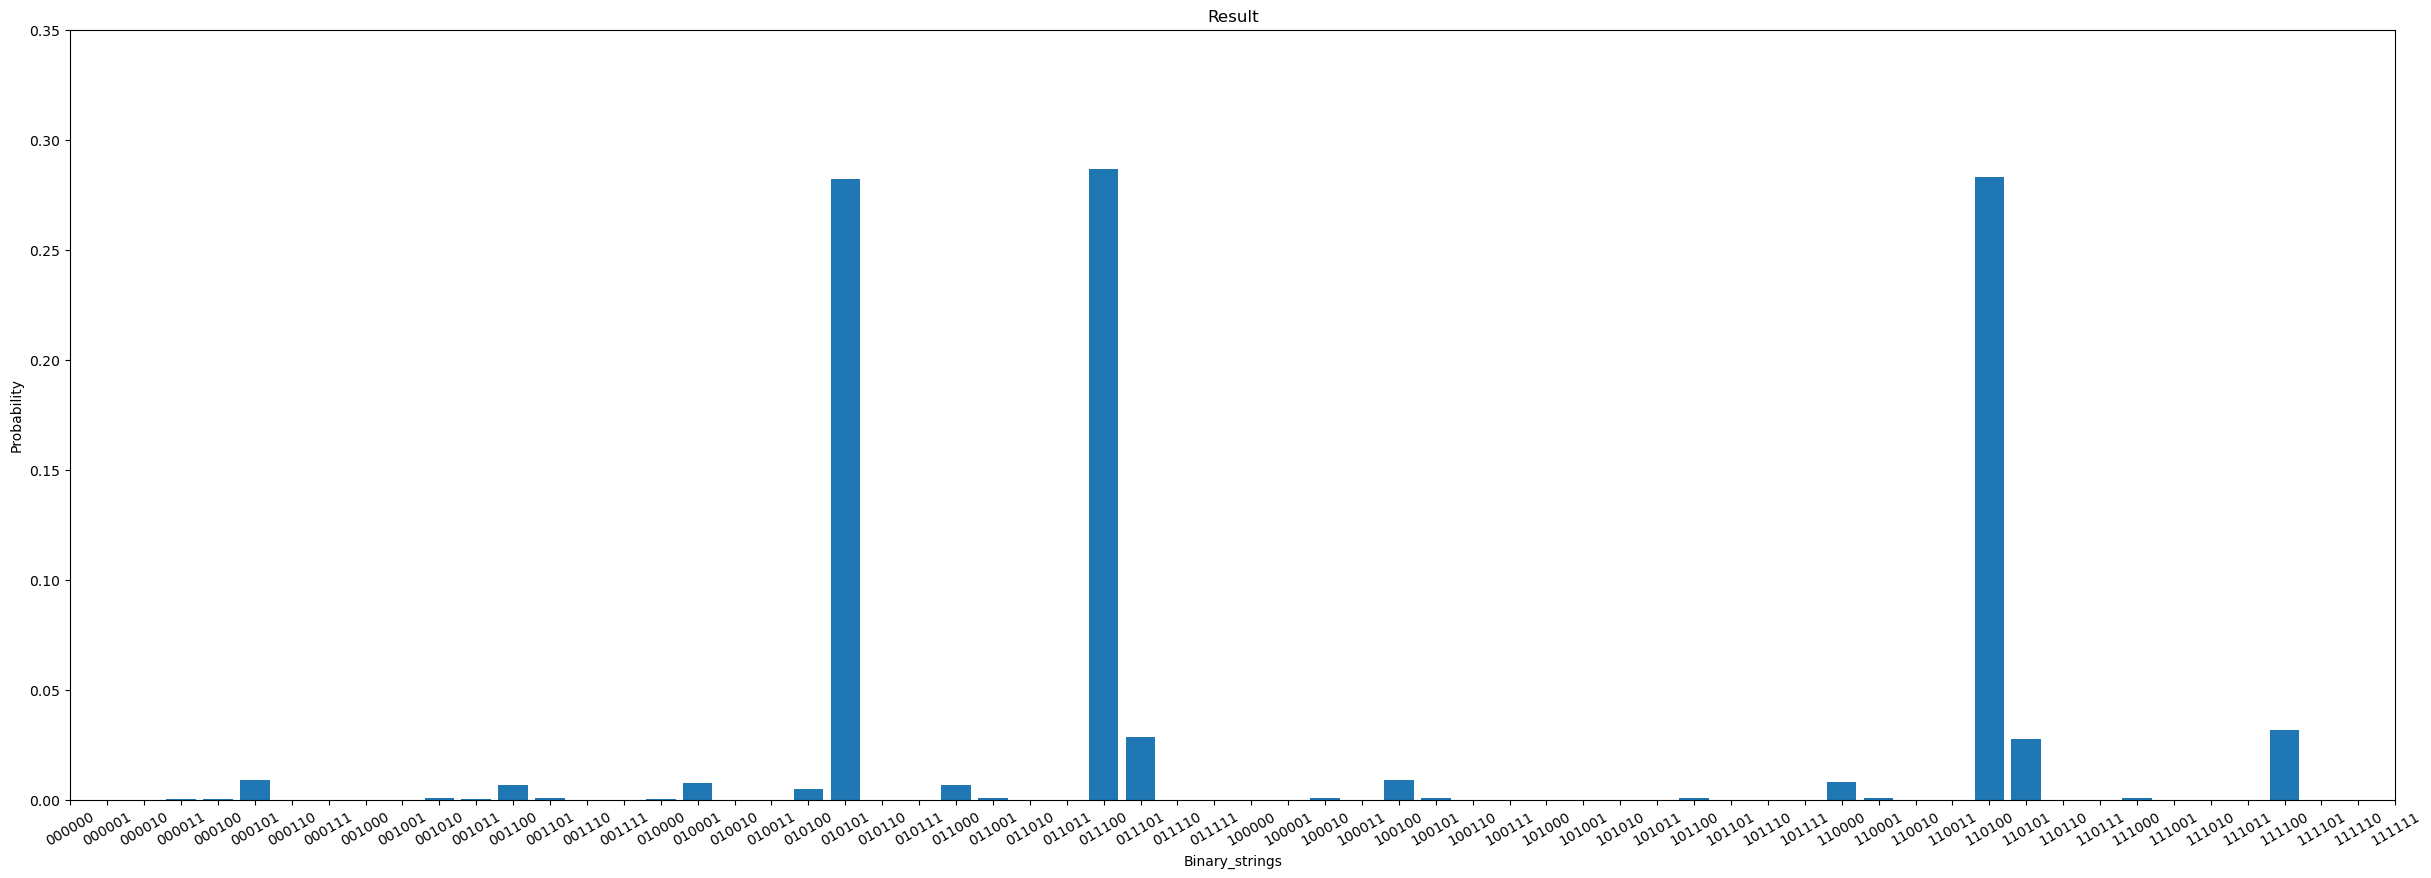

(PyObject <matplotlib.patches.Rectangle object at 0x0000000067D97250>, PyObject <matplotlib.patches.Rectangle object at 0x0000000067D970D0>, PyObject <matplotlib.patches.Rectangle object at 0x0000000067D97730>, PyObject <matplotlib.patches.Rectangle object at 0x0000000067D97A00>, PyObject <matplotlib.patches.Rectangle object at 0x0000000067D94040>, PyObject <matplotlib.patches.Rectangle object at 0x0000000067D76430>, PyObject <matplotlib.patches.Rectangle object at 0x0000000067D7D4F0>, PyObject <matplotlib.patches.Rectangle object at 0x0000000067D97D00>, PyObject <matplotlib.patches.Rectangle object at 0x0000000067D97FA0>, PyObject <matplotlib.patches.Rectangle object at 0x0000000067DAC2B0>, PyObject <matplotlib.patches.Rectangle object at 0x0000000067DAC580>, PyObject <matplotlib.patches.Rectangle object at 0x0000000067DAC850>, PyObject <matplotlib.patches.Rectangle object at 0x0000000067DACB20>, PyObject <matplotlib.patches.Rectangle object at 0x0000000067DACDF0>, PyObject <matplotli

In [31]:
fig = plt.figure(figsize=(30,10)) #이걸로 size 조절 가능
ax = fig.add_subplot(1,1,1)

ax.set(xlim=[0.0,63.], ylim=[0.0,0.35], title = "Result", xlabel="Binary_strings", ylabel = "Probability")

ax.set_xticks(x)
g = plt.figure() #이걸로 size 조절 가능
ax = fig.add_subplot(1,1,1)

ax.set(xlim=[0.0,63.], ylim=[0.0,0.35], title = "Result", xlabel="Binary_strings", ylabel = "Probability")

ax.set_xticks(x)
ax.set_xticklabels(y, rotation=30) # fontsize도 넣을 수 있음.
ax.bar(x,Pr)

#plt.show()